In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 讀取數據
df = pd.read_excel('final_error.xlsx')  # 更換為您的 Excel 文件路徑

# 預處理數據
features = df.drop(['節肢動物', '是否為昆蟲'], axis=1)
labels = df['是否為昆蟲']

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [2]:
X_train

,復眼,翅膀,變態過程,產生聲音,社會行為
12,0,0,0,0,0
32,1,0,0,0,0
9,0,0,0,0,0
0,0,0,0,0,0
4,0,0,0,0,0
16,1,0,0,0,0
17,1,0,0,0,0
5,0,0,0,0,1
13,0,0,0,0,0
11,0,0,0,0,0


In [3]:
X_test

,復眼,翅膀,變態過程,產生聲音,社會行為
15,1,0,0,0,0
19,1,0,0,0,0
27,0,0,1,1,0
26,0,0,0,0,0
8,1,0,0,0,0
24,1,1,0,0,0
21,1,0,0,0,0


In [4]:
y_train

12    0
32    1
9     0
0     0
4     0
16    0
17    0
5     0
13    0
11    0
1     0
2     0
30    1
3     0
29    1
23    0
31    1
22    0
18    0
25    1
6     0
20    0
33    1
7     0
10    0
14    0
28    1
Name: 是否為昆蟲, dtype: int64

In [5]:
y_test

15    0
19    0
27    1
26    1
8     0
24    1
21    0
Name: 是否為昆蟲, dtype: int64

In [6]:
# 特徵縮放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(15, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [8]:

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# 訓練模型
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

class WeightsHistory(Callback):
    def __init__(self):
        super(WeightsHistory, self).__init__()
        self.weights = []

    def on_epoch_end(self, epoch, logs=None):
        # 假設我們只關注模型的第一層權重
        self.weights.append(self.model.layers[0].get_weights()[0])

# 創建回調實例
weights_history = WeightsHistory()
#history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), verbose=1)
history = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test), verbose=1, callbacks=[weights_history])


Epoch 1/300


1/1 [==============================] - 1s 1s/step - loss: 0.7750 - accuracy: 0.1852 - val_loss: 0.7794 - val_accuracy: 0.8571
Epoch 2/300
1/1 [==============================] - 0s 34ms/step - loss: 0.7023 - accuracy: 0.5556 - val_loss: 0.7876 - val_accuracy: 0.8571
Epoch 3/300
1/1 [==============================] - 0s 28ms/step - loss: 0.6420 - accuracy: 0.5556 - val_loss: 0.7834 - val_accuracy: 0.7143
Epoch 4/300
1/1 [==============================] - 0s 29ms/step - loss: 0.5928 - accuracy: 0.8148 - val_loss: 0.7750 - val_accuracy: 0.7143
Epoch 5/300
1/1 [==============================] - 0s 35ms/step - loss: 0.5562 - accuracy: 0.8148 - val_loss: 0.7686 - val_accuracy: 0.7143
Epoch 6/300
1/1 [==============================] - 0s 36ms/step - loss: 0.5249 - accuracy: 0.8889 - val_loss: 0.7681 - val_accuracy: 0.7143
Epoch 7/300
1/1 [==============================] - 0s 41ms/step - loss: 0.4968 - accuracy: 0.8889 - val_loss: 0.7710 - val_accuracy: 0.7143
Epoch 8/300
1/1 [===

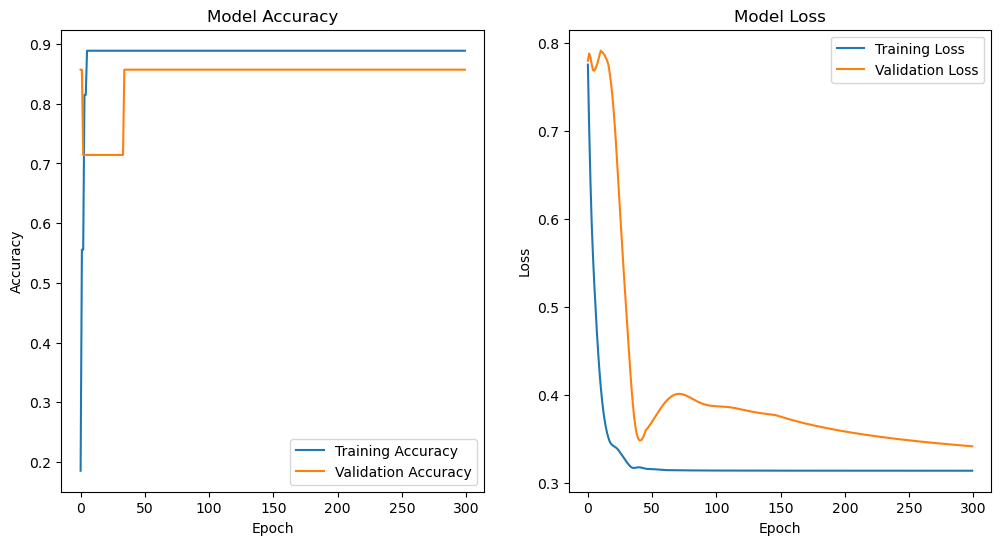

In [10]:
# 繪製訓練過程
plt.figure(figsize=(12, 6))

# 繪製準確度變化
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 繪製損失變化
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# 預測測試集
predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)  # 二進制化預測結果

# 創建結果表格
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_classes.flatten()})
results_df.reset_index(drop=True, inplace=True)  # 重設索引以對齊資料

print(results_df)  # 顯示前10行的預測結果及實際結果

1/1 [==============================] - 0s 69ms/step
   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       1          0
4       0          0
5       1          1
6       0          0


In [12]:
# 訓練模型並使用回調
#history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), verbose=1, callbacks=[weights_history])

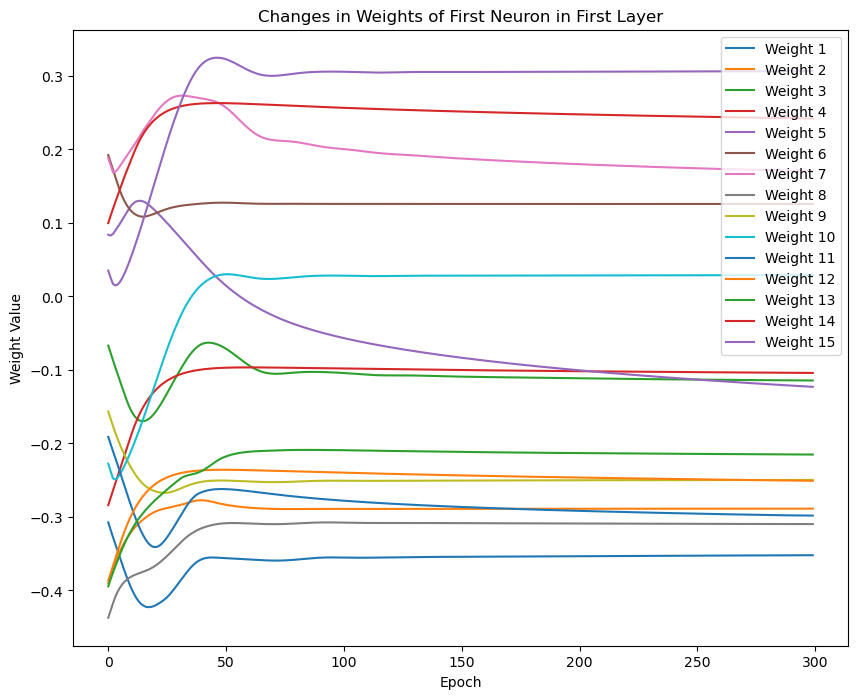

In [13]:
# 假設我們要觀察第一層第一個神經元的所有權重變化
weights = np.array(weights_history.weights)  # 轉換為 NumPy 數組以便處理
# weights 的形狀是 [epochs, neurons, features]

# 選擇第一個神經元的所有權重進行繪圖
first_neuron_weights = weights[:, 0, :]  # 選擇第一個神經元

plt.figure(figsize=(10, 8))
for i in range(first_neuron_weights.shape[1]):
    plt.plot(first_neuron_weights[:, i], label=f'Weight {i+1}')

plt.title('Changes in Weights of First Neuron in First Layer')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend()
plt.show()
